# Neural Networks with PyTorch

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [14]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])

# Download and load training data
trainset = datasets.MNIST("MNIST/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST("MNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [15]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

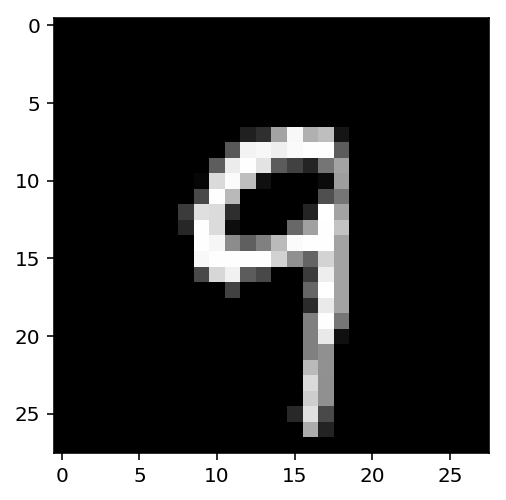

In [25]:
plt.imshow(images[1].numpy().squeeze(), cmap="gray")

In [27]:
from torch import nn
import torch.nn.functional as F

In [29]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x
    
model = Network()
model
        

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

## Initializing weights and biases

In [30]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0137, -0.0019,  0.0352,  ..., -0.0129, -0.0249,  0.0219],
        [ 0.0297, -0.0337,  0.0160,  ...,  0.0082,  0.0115, -0.0217],
        [-0.0311,  0.0078, -0.0116,  ..., -0.0069, -0.0015,  0.0004],
        ...,
        [ 0.0030,  0.0318,  0.0271,  ..., -0.0229, -0.0156, -0.0172],
        [-0.0016, -0.0283,  0.0284,  ...,  0.0189,  0.0266,  0.0096],
        [ 0.0009,  0.0339, -0.0086,  ...,  0.0188,  0.0254, -0.0179]],
       requires_grad=True)
Parameter containing:
tensor([-1.5234e-02, -3.2867e-02, -2.2089e-02, -3.5668e-02,  1.2601e-02,
        -2.0262e-02, -3.2187e-02, -2.6048e-02, -3.2407e-02, -3.3505e-02,
        -3.5560e-02,  3.3488e-02,  1.0846e-02,  5.1393e-04,  3.5645e-02,
         5.4847e-04, -2.1044e-02,  2.4435e-03, -1.6979e-02,  2.1129e-02,
        -2.6059e-02,  2.4545e-02,  2.5338e-02,  3.0087e-02,  1.9737e-02,
        -2.8040e-02,  1.2241e-02, -3.5461e-02,  8.3877e-03,  1.5875e-02,
        -5.9068e-05,  2.5623e-03, -1.2241e-02, -1.7222e-0

In [31]:
model.fc1.bias.data.fill_(0) # reseting

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0063, -0.0073, -0.0072,  ...,  0.0100,  0.0066,  0.0123],
        [-0.0032,  0.0066, -0.0022,  ...,  0.0025, -0.0042, -0.0064],
        [-0.0135,  0.0108,  0.0151,  ...,  0.0040, -0.0125,  0.0106],
        ...,
        [ 0.0031, -0.0082, -0.0147,  ...,  0.0101,  0.0114,  0.0156],
        [-0.0098,  0.0200, -0.0111,  ...,  0.0176,  0.0019, -0.0106],
        [ 0.0050,  0.0104, -0.0012,  ..., -0.0081,  0.0106,  0.0086]])

## Forward pass

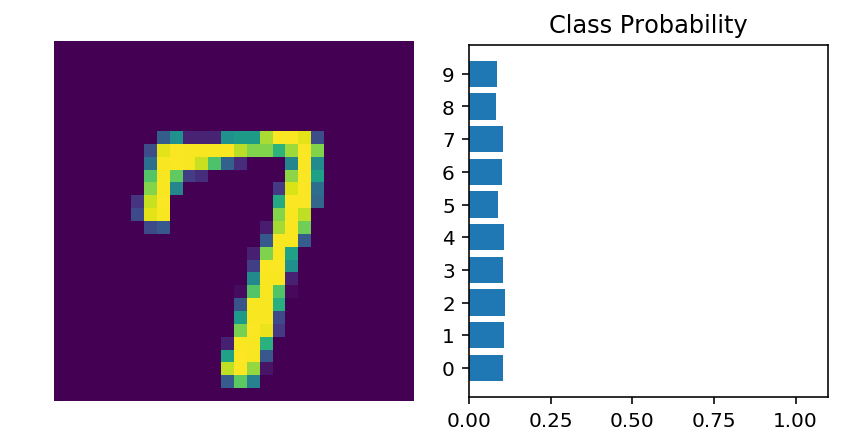

In [34]:
images, labels = next(iter(trainloader))

images.resize_(images.shape[0], 1, 784)

ps = model.forward(images[0])

helper.view_classify(images[0].view(1, 28, 28), ps)

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


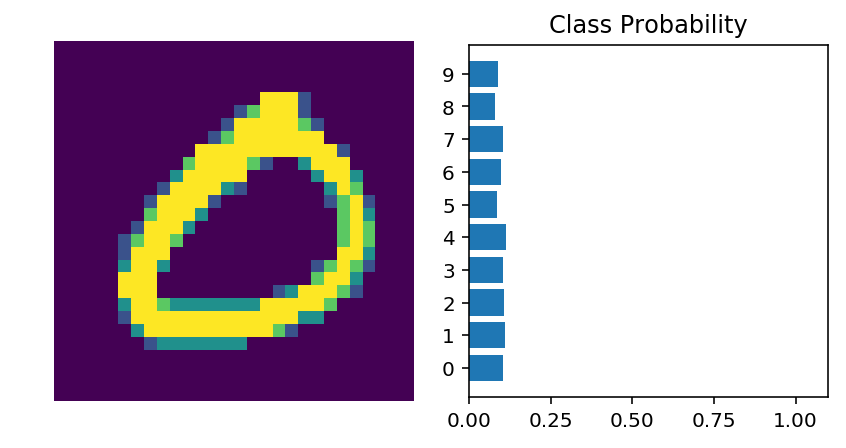

In [39]:
input_size = 784
hidden_size = [128, 64]
output_size = 10

nn.Sequential(nn.Linear(input_size, hidden_size[0]),
              nn.ReLU(),
              nn.Linear(hidden_size[0], hidden_size[1]),
              nn.ReLU(),
              nn.Linear(hidden_size[1], output_size),
              nn.Softmax(dim=1))

print(model)

# Forward pass through the network and display
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [41]:
# Use an orderedDict to name each ayer
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ("fc1", nn.Linear(input_size, hidden_size[0])),
                      ("relu1", nn.ReLU()),
                      ("fc2", nn.Linear(hidden_size[0], hidden_size[1])),
                      ("relu2", nn.ReLU()),
                      ("fc3", nn.Linear(hidden_size[1], output_size)),
                      ("softmax", nn.Softmax(dim=1))
]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [43]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the layers, 400/200/100
        self.fc1 = nn.Linear(784, 400)
        self.fc2 = nn.Linear(400, 200)
        self.fc3 = nn.Linear(200, 100)
        self.fc4 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)